# Analyse Research paper stage 

To do: problemen met EndTimeMillis & StartTimeMillis
    multitasking maten eens voorleggen aan Kyle
    Alle mogelijke data verzamelen en vergelijken. 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress
import seaborn as sns
from tqdm import tqdm   #progressbar
tqdm.pandas()
sns.set();

#### Gegevens inlezen 

heel vaak problemen met die Millis!

In [2]:
#   Appevents
filename = 'D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/floor_appevents_Millis.xlsx' # aan te passen

In [3]:
df = pd.read_excel(filename, parse_dates=['startTime', 'endTime'], dtype={'id': 'category',
    'application': 'category',
    'model':'category',
    'data_version':'category'})

In [4]:
df = df.drop_duplicates(['id','session','application','startTimeMillis','endTimeMillis'])

In [5]:
df.head()

,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis
0,com.tinder,67,1.4,2018-11-06 18:31:18.495,1541525478495,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541525474,2018-11-06 18:31:16.853,1541525476853
1,com.tinder,67,1.4,2018-11-06 18:36:03.063,1541525763063,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541525645,2018-11-06 18:34:08.065,1541525648065
2,com.instagram.android,73,1.4,2018-11-07 19:24:56.992,1541615096992,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541614866,2018-11-07 19:24:54.966,1541615094966
3,com.android.systemui,69,1.4,2018-11-07 19:38:12.620,1541615892620,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541614866,2018-11-07 19:38:10.092,1541615890092
4,com.facebook.orca,64,1.4,2018-11-07 23:04:25.243,1541628265243,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541628241,2018-11-07 23:04:03.090,1541628243090


In [6]:
df['datum'] = df['startTime'].dt.date

In [7]:
df.head()

,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis,datum
0,com.tinder,67,1.4,2018-11-06 18:31:18.495,1541525478495,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541525474,2018-11-06 18:31:16.853,1541525476853,2018-11-06
1,com.tinder,67,1.4,2018-11-06 18:36:03.063,1541525763063,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541525645,2018-11-06 18:34:08.065,1541525648065,2018-11-06
2,com.instagram.android,73,1.4,2018-11-07 19:24:56.992,1541615096992,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541614866,2018-11-07 19:24:54.966,1541615094966,2018-11-07
3,com.android.systemui,69,1.4,2018-11-07 19:38:12.620,1541615892620,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541614866,2018-11-07 19:38:10.092,1541615890092,2018-11-07
4,com.facebook.orca,64,1.4,2018-11-07 23:04:25.243,1541628265243,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541628241,2018-11-07 23:04:03.090,1541628243090,2018-11-07


In [8]:
df["duur_ms"] = (df['endTimeMillis'] - df['startTimeMillis'])

In [9]:
df['duur_s'] = df['duur_ms']/1000

In [10]:
df.head()

,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis,datum,duur_ms,duur_s
0,com.tinder,67,1.4,2018-11-06 18:31:18.495,1541525478495,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541525474,2018-11-06 18:31:16.853,1541525476853,2018-11-06,1642,1.642
1,com.tinder,67,1.4,2018-11-06 18:36:03.063,1541525763063,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541525645,2018-11-06 18:34:08.065,1541525648065,2018-11-06,114998,114.998
2,com.instagram.android,73,1.4,2018-11-07 19:24:56.992,1541615096992,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541614866,2018-11-07 19:24:54.966,1541615094966,2018-11-07,2026,2.026
3,com.android.systemui,69,1.4,2018-11-07 19:38:12.620,1541615892620,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541614866,2018-11-07 19:38:10.092,1541615890092,2018-11-07,2528,2.528
4,com.facebook.orca,64,1.4,2018-11-07 23:04:25.243,1541628265243,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541628241,2018-11-07 23:04:03.090,1541628243090,2018-11-07,22153,22.153


In [11]:
#   Sessions
filename_s = 'D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/floor_sessions.csv' # aan te passen
df_s = pd.read_csv(filename_s, sep=';', parse_dates=['timestamp'], dtype={
    'id': 'category',
    'data_version':'category'
    })
df_s['datum'] = df_s['timestamp'].dt.date
df_s = df_s.drop_duplicates(['id','datum','timestamp','session on'])

In [12]:
#   Notifications
filename_n = 'D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/floor_notifications.csv'
df_n = pd.read_csv(filename_n, sep=";", parse_dates=['time'],dtype={
    'id': 'category',
    'application': 'category',
    'notificationID':'category',
    'data_version':'category'})

## Part 1: universiteitsstudenten 

### Focus 1: time distortion in smartphone use? 

over zaterdagen/zondagen effectief gelogd? 

#### Doel: 

onderzoeken van de accuraatheid van zelf-rapportering van de gemiddelde dagelijkse duur van smartphonegebruik en het eigenlijke smartphone gebruik gelogged via de MobileDNA applicatie. 

#### stap 1:

Gemiddelde <b>gerapporteerde duur </b> van smartphonegebruik per dag tijdens de week en tijdens het weekend 

In [13]:
df_qualtrics = pd.read_excel('D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/qualtrics/qualtricsoriginal.xlsx')

In [14]:
df_qualtrics.head()

,ppn,NAAM,MobileDNA ID,Geslacht,leeftijd,IQ,U_WEEK,MIN_WEEK,G_WEEK,U_WEEKEND,...,SM [0-3],WBniet maand,WB<1 week,WB 1/2week,WB >3,WB [0-3],sleepquality,LS #tot min,wakker #tot min,vermoeidheid
0,1,Marion,8a2f0420-8011-4adc-b128-95a40786d765,V,18,22.0,1,30,90,2,...,0,0.0,0.0,0.0,1.0,3,18,300.0,1140.0,3.0
1,2,Wannes,a0d70d38-201b-49ad-b700-22d84f037555,M,21,21.0,1,45,105,2,...,0,1.0,0.0,0.0,0.0,0,5,435.0,677.0,2.0
2,3,Sander,0870854d-f706-4144-bcb4-0ace2e447425,M,23,22.0,4,0,240,3,...,0,1.0,0.0,0.0,0.0,0,10,480.0,848.0,1.0
3,4,Wouter,cca5f33f-7fb0-4b76-a0e6-ae03dbffb966,M,19,29.0,4,30,270,3,...,0,0.0,1.0,0.0,0.0,1,12,390.0,420.0,2.0
4,5,victor,c812a99a-59e4-4c5a-a721-0150d42102c6,M,18,27.0,5,0,300,3,...,0,1.0,0.0,0.0,0.0,0,9,220.0,750.0,2.0


G_WEEK & G_WEEKEND zijn het geschatte gemiddelde gebruik per dag tijdens week/weekend in minuten. 

Gemiddelde gerapporteerde waarde per persoon nemen (want er was geen significant verschil tussen WEEK & WEEKEND)

In [15]:
self = df_qualtrics[["ppn", "MobileDNA ID", "G_WEEK", "G_WEEKEND"]]

aanmaken van een nieuwe variabele <b>"Dself"</b> = de gemiddelde geschatte duur in minuten per dag over WEEK/WEEKEND heen. Dit gemiddelde wordt genomen aangezien in de analyses geen significant hoofdeffect van WEEK/WEEKEND gevonden is. 

In [16]:
self["Dself"] = (self["G_WEEK"]+self["G_WEEKEND"])/2

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
self["Dself"].describe()

count     40.000000
mean     243.387500
std      107.420662
min       75.000000
25%      180.000000
50%      216.750000
75%      277.500000
max      672.500000
Name: Dself, dtype: float64

In [18]:
243.387500/60

4.0564583333333335

De gemiddelde zelfgerapporteerde duur is gelijk aan 243.3875 minuten. Dit is gelijk aan: 4.05645 uur. 

De "self dataset " moet gelinkt worden met de apptime en de screentime en in een dataset worden gemerged om dan analyses op te doen. 

#### Stap 2: 

Belangrijk gevoel voor nuancering in smartphonegebruik: 
apptime+ en screentime <br>
apptime = activiteit binnen applicatie <br>
screentime = alles binnen app, alles tussen applicaties binnen dezelfde sessie (zoeken naar apps), uitdooftijd van je scherm, alles van notificatiechecken zonder openen van app, uur checken <br>
apptime+ = appgebruik, tussen apps in zelfde sessie en uitdooftijd van je scherm. <br>

Belangrijke nuancering: welke maat van duur wordt hiervoor uit de MobileDNA data? 
    <li> puur gebruik van applicaties? duration van de appevents? </li>
    <li> overall screentime => including checking behaviour => dit wordt vaak niet bewust gedaan door mensen dus ook niet in rekening gebracht </li>
    

De gemiddelde <b> apptime 'Dapp' </b> per participant id. 

In [19]:
mm = df.groupby(['id','datum'])['duur_s'].sum()/60

In [20]:
apptime = mm.groupby(['id']).mean()

In [21]:
apptime = apptime.to_frame()

In [22]:
apptime.columns = ["min"]

In [23]:
apptime["h"] = apptime["min"]/60

In [24]:
apptime.describe()

,min,h
count,37.000000,37.000000
mean,166.487550,2.774792
std,88.669612,1.477827
min,14.337248,0.238954
25%,114.983827,1.916397
50%,159.328718,2.655479
75%,206.448258,3.440804
max,426.653480,7.110891


In [25]:
apptime = apptime.reset_index()

In [26]:
apptime = apptime[["id", "min"]]

In [27]:
apptime.columns = ["id", "Dapp"]

In [28]:
apptime.head()

,id,Dapp
0,066873fe-d25d-4fcc-bca8-01bd573bcf7e,108.571968
1,0870854d-f706-4144-bcb4-0ace2e447425,156.402425
2,0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,188.407333
3,115b2e73-f696-4628-9c3c-287a23b88e36,217.799856
4,12bca59c-3c51-4386-a48f-bf96b3ff87b3,40.151667


In [29]:
self = self[["ppn", "MobileDNA ID", "Dself"]]

In [30]:
self.columns = ["ppn", "id", "Dself"]

In [31]:
time_dis = pd.merge(self, apptime, on="id")

In [32]:
time_dis.describe()

,ppn,Dself,Dapp
count,34.000000,34.000000,34.000000
mean,20.558824,233.941176,164.073437
std,12.417464,103.928498,90.482212
min,1.000000,75.000000,14.337248
25%,10.250000,180.000000,110.174933
50%,20.000000,211.750000,157.865571
75%,30.500000,255.000000,203.687471
max,43.000000,672.500000,426.653480


Gemiddeldes wijzen al op overschatting. 

Deze apptime werd enkel bij 37 participanten geregistreerd, de Dself bij 40 participanten bevraagd. Samengevoegd leidt dit tot 34 participanten. 

==== > VRAAG: valt op dat er een verschil is tussen gemiddelde van (use_WEEK + use_WEEKEND)/2 tov Dapp. Heb wel van de zelf-rapportage het gemiddelde gepakt. Wat is hier nu de juiste manier ? 

significante overschatting of onderschatting? => discussie in de literatuur! 

altijd: "zelfinschatting" - "realiteit" => positieve waarde = overschatting, negatieve waarde = onderschatting

<b>-------------------------------------------------------------------------INTERMEZZO-------------------------------------------------------------------------------------------</b>

Op welke manier werd dit de eerste keer berekend? 

In [47]:
realUse = pd.read_excel("Week_weekend.xlsx")

wideUse bevat alle nodige informatie van de juiste participanten. 

In [48]:
wideUse = pd.read_excel("wideUse.xlsx")

Daarna bereken je gemiddelde ingeschatte duur over WEEK & WEEKEND en gemiddelde gebruik over WEEK & WEEKEND als een nieuwe kolom. 

In [49]:
wideUse.head()

,ppn,WEEK,WEEKEND,WEEK.1,WEEKEND.1
0,1,93.575857,59.394079,90,120
1,2,170.327992,258.377163,105,135
2,3,155.398902,149.627047,240,180
3,4,180.855594,142.894187,270,210
4,5,241.091306,235.971797,300,190


In [50]:
wideUse["Dapp"] = (wideUse["WEEK"]+wideUse["WEEKEND"])/2

In [51]:
wideUse

,ppn,WEEK,WEEKEND,WEEK.1,WEEKEND.1,Dapp
0,1,93.575857,59.394079,90,120,76.484968
1,2,170.327992,258.377163,105,135,214.352577
2,3,155.398902,149.627047,240,180,152.512975
3,4,180.855594,142.894187,270,210,161.874891
4,5,241.091306,235.971797,300,190,238.531552
5,6,177.922008,175.084126,360,360,176.503067
6,8,213.760335,166.163972,180,330,189.962153
7,9,165.289222,109.890183,210,300,137.589703
8,10,247.708941,116.062314,200,240,181.885627
9,11,73.993872,76.478897,150,240,75.236385


In [73]:
wideUse["Dself"] = (wideUse["WEEK.1"]+wideUse["WEEKEND.1"])/2

In [75]:
wideUse["Dapp"].describe()

count     34.000000
mean     158.197516
std      101.490911
min       11.544196
25%       77.261496
50%      145.051339
75%      209.143612
max      439.660518
Name: Dapp, dtype: float64

In [76]:
#gemiddelde werkelijke gebruik
158.197516/60

2.636625266666667

In [77]:
wideUse["Dself"].describe()

count     34.000000
mean     227.294118
std       75.200250
min       75.000000
25%      182.500000
50%      211.750000
75%      255.000000
max      405.000000
Name: Dself, dtype: float64

In [78]:
#gemiddelde ingeschatte gebruik
227.294118/60

3.7882352999999998

Correlatie bekijken: zal iemand die het gebruik hoger inschat ook werkelijk hoger scoren? 

In [79]:
linregress(wideUse["Dapp"], wideUse["Dself"])

LinregressResult(slope=0.5115604137834772, intercept=146.36653087690382, rvalue=0.6904063874671648, pvalue=6.227373584982237e-06, stderr=0.09475643185438955)

Significante p-waarde van een positieve regressie. een correlatie van 0.69. 

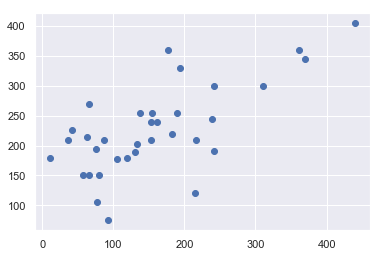

In [89]:
plt.scatter(wideUse["Dapp"], wideUse["Dself"])

In welke richting vindt de time distortion plaats? 

In [82]:
wideUse["verschilD"] = wideUse["Dself"]-wideUse["Dapp"]

In [83]:
wideUse["verschilD"].describe()

count     34.000000
mean      69.096602
std       73.599753
min      -94.352577
25%       11.980094
50%       70.454712
75%      119.175286
max      204.508075
Name: verschilD, dtype: float64

In [ ]:
Gemiddeld vind je een positieve waarde: dit wil zeggen dat er gemiddeld een overschatting plaatsvindt. 

In [ ]:
Nu gaan we kijken of iemand die meer gebruikt, ook meer zal overschatten. 

In [84]:
wideUse["deltaD"] = wideUse["verschilD"]/wideUse["Dapp"]

In [86]:
wideUse["deltaD"].describe()

count    34.000000
mean      1.265252
std       2.644770
min      -0.440175
25%       0.072726
50%       0.516074
75%       1.216256
max      14.592251
Name: deltaD, dtype: float64

Gemiddeld wordt er een overschatting gevonden

Zal iemand die een grotere time distortion vertoond, ook iemand zijn die meer smartphonegebruik vertoond? Significante correlatie tussen Dapp & deltaD? 

In [87]:
linregress(wideUse["Dapp"], wideUse["deltaD"])

LinregressResult(slope=-0.013109656270905998, intercept=3.3391672957860745, rvalue=-0.5030724324293006, pvalue=0.0024249292131958747, stderr=0.003981276095577079)

Er wordt een significant verband gevonden met een negatieve slope. 

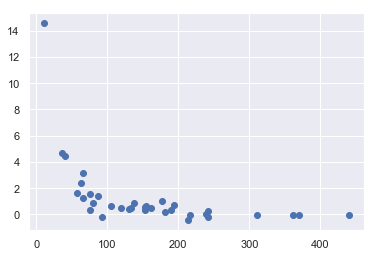

In [88]:
plt.scatter(wideUse["Dapp"], wideUse["deltaD"])

Zou er zonder die outlier ook nog een significant verband zijn? 

In [90]:
linregress(wideUse["Dself"], wideUse["deltaD"])

LinregressResult(slope=-0.004445689907417125, intercept=2.27573140229572, rvalue=-0.12640682134082226, pvalue=0.4762370547225794, stderr=0.006167312006757851)

Geen significant verband

In [91]:
linregress(wideUse["Dapp"], wideUse["verschilD"])

LinregressResult(slope=-0.4884395862165228, intercept=146.3665308769038, rvalue=-0.6735372979251338, pvalue=1.2671837893130971e-05, stderr=0.09475643185438953)

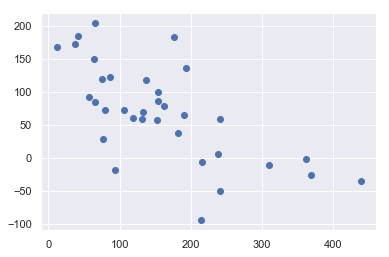

In [92]:
plt.scatter(wideUse["Dapp"], wideUse["verschilD"])

Wie overschat gebruikt de smartphone dagelijks gemiddeld minder. Wie onderschat of correct inschat, gebruikt de smartphone dagelijks meer. 

In [93]:
linregress(wideUse["Dself"], wideUse["verschilD"])

LinregressResult(slope=0.06822152963303302, intercept=53.5902492143929, rvalue=0.06970507160244736, pvalue=0.6952642753792329, stderr=0.17259350167013743)

De time distortion vertoont geen significant verband met de ingeschatte tijd, wel met de werkelijke tijd iemand gebruikt. 

Belangrijk om te kijken of de verschilscore en deltaD ook afhankelijk zijn van de verschillende maten van multitasking

Ook de link tussen verschilscore/deltaD vergelijken met de Multitasking verschil score (screentime - app time)

<b>-------------------------------------------------------------------------INTERMEZZO-------------------------------------------------------------------------------------------</b>

#### Stap 3: bereken verschilD en deltaD

<b>VerschilD</b> wordt berekend door de geschatte duur af te trekken met de werkelijke duur. <br>
<b>DeltaD </b>wordt berekend door het verschil te delen door het eigenlijke gebruik Dapp. 

Ook het verschil berekenen tussen de zelf-rapportering en de totale smartphonegebruik geregistreerd door de applicatie (deltaD) <br>
=> dan kan je de correlatie bekijken tussen deltaD en Dapplicatie. <br>
Wanneer participanten hun smartphone meer gebruiken => grotere time distortion (onderschatting of overschatting)? 

formule voor deltaD = <b>(Dapp - Dself)/Dapp </b>(Lin et al., 2015)

pas op! onze verschilD is omgekeerd berekend dan hier want hier doen ze Dapp - Dself; terwijl ik het logischer vindt om Dself te vergelijken met realiteit. Positieve waarde: overschatting, negatieve waarde: onderschatting. 

In [33]:
time_dis["verschilD"] = time_dis["Dself"]-time_dis["Dapp"]

In [34]:
time_dis["deltaD"] = time_dis["verschilD"]/time_dis["Dapp"]

In [35]:
time_dis.describe()

,ppn,Dself,Dapp,verschilD,deltaD
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,20.558824,233.941176,164.073437,69.867740,1.152611
std,12.417464,103.928498,90.482212,102.028090,3.407925
min,1.000000,75.000000,14.337248,-71.281043,-0.191987
25%,10.250000,180.000000,110.174933,17.625716,0.121725
50%,20.000000,211.750000,157.865571,52.697330,0.343197
75%,30.500000,255.000000,203.687471,99.711733,0.921864
max,43.000000,672.500000,426.653480,491.300353,19.924518


toch nog onderscheid maken tussen WEEK & WEEKEND

In [36]:
df['dag'] = df.startTime.dt.day

In [37]:
df['moment'] = np.where((df.dag == 3)|(df.dag == 4)|(df.dag==10)|(df.dag==11)|(df.dag==17)|(df.dag==18), 'WEEKEND', 'WEEK')

In [38]:
mm = df.groupby(['id',"datum", "moment"])['duur_s'].sum()/60

In [39]:
mm.head()

id                                    datum       moment 
066873fe-d25d-4fcc-bca8-01bd573bcf7e  2018-11-03  WEEKEND     70.003200
                                      2018-11-04  WEEKEND    216.544450
                                      2018-11-05  WEEK       276.785617
                                      2018-11-06  WEEK       264.799683
                                      2018-11-07  WEEK         8.087067
Name: duur_s, dtype: float64

In [40]:
apptime = mm.groupby(['id', "moment"]).mean()

In [41]:
apptime_long = apptime.to_frame().reset_index()

In [42]:
apptime_long.head()

,id,moment,duur_s
0,066873fe-d25d-4fcc-bca8-01bd573bcf7e,WEEK,109.048455
1,066873fe-d25d-4fcc-bca8-01bd573bcf7e,WEEKEND,107.618993
2,0870854d-f706-4144-bcb4-0ace2e447425,WEEK,158.157738
3,0870854d-f706-4144-bcb4-0ace2e447425,WEEKEND,152.189673
4,0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,WEEK,323.296667


In [43]:
apptime_long.columns = ["id", "moment", "Dapp"]

In [44]:
apptime_wide = apptime_long.pivot(index="id", columns="moment", values="Dapp")

In [45]:
apptime_wide.head()

moment,WEEK,WEEKEND
id,,
066873fe-d25d-4fcc-bca8-01bd573bcf7e,109.048455,107.618993
0870854d-f706-4144-bcb4-0ace2e447425,158.157738,152.189673
0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,323.296667,120.962667
115b2e73-f696-4628-9c3c-287a23b88e36,209.547339,237.605897
12bca59c-3c51-4386-a48f-bf96b3ff87b3,47.826567,24.801867


In [46]:
apptime_wide = apptime_wide.reset_index()

In [47]:
apptime_wide.columns = ["id", "Dapp_WEEK", "Dapp_WEEKEND"]

In [48]:
self_ww = df_qualtrics[["MobileDNA ID", "G_WEEK", "G_WEEKEND"]]

In [49]:
self_ww.columns = ["id", "Dself_WEEK", "Dself_WEEKEND"]

In [50]:
time_dis_WEEK_WEEKEND = pd.merge(apptime_wide, self_ww, on="id")

In [51]:
time_dis_WEEK_WEEKEND.head()

,id,Dapp_WEEK,Dapp_WEEKEND,Dself_WEEK,Dself_WEEKEND
0,066873fe-d25d-4fcc-bca8-01bd573bcf7e,109.048455,107.618993,210,210
1,0870854d-f706-4144-bcb4-0ace2e447425,158.157738,152.189673,240,180
2,0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,323.296667,120.962667,210,243
3,115b2e73-f696-4628-9c3c-287a23b88e36,209.547339,237.605897,270,210
4,12bca59c-3c51-4386-a48f-bf96b3ff87b3,47.826567,24.801867,180,180


In [52]:
time_dis_WEEK_WEEKEND["verschilD_WEEK"] = time_dis_WEEK_WEEKEND["Dself_WEEK"] -  time_dis_WEEK_WEEKEND["Dapp_WEEK"]
time_dis_WEEK_WEEKEND["verschilD_WEEKEND"] = time_dis_WEEK_WEEKEND["Dself_WEEKEND"] -  time_dis_WEEK_WEEKEND["Dapp_WEEKEND"]

In [53]:
time_dis_WEEK_WEEKEND["deltaD_WEEK"]= time_dis_WEEK_WEEKEND["verschilD_WEEK"] / time_dis_WEEK_WEEKEND["Dapp_WEEK"]  
time_dis_WEEK_WEEKEND["deltaD_WEEKEND"] = time_dis_WEEK_WEEKEND["verschilD_WEEKEND"] / time_dis_WEEK_WEEKEND["Dapp_WEEKEND"]

In [54]:
time_distortion_apptime = pd.merge(time_dis, time_dis_WEEK_WEEKEND, on = "id")

In [55]:
time_distortion_apptime.describe()

,ppn,Dself,Dapp,verschilD,deltaD,Dapp_WEEK,Dapp_WEEKEND,Dself_WEEK,Dself_WEEKEND,verschilD_WEEK,verschilD_WEEKEND,deltaD_WEEK,deltaD_WEEKEND
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,20.558824,233.941176,164.073437,69.867740,1.152611,173.647205,148.463927,226.470588,241.411765,52.823384,92.947838,1.367355,1.233809
std,12.417464,103.928498,90.482212,102.028090,3.407925,94.812335,93.978673,97.384659,118.464447,107.469596,108.924787,5.316729,1.996582
min,1.000000,75.000000,14.337248,-71.281043,-0.191987,9.326293,24.801867,90.000000,60.000000,-114.425339,-51.734733,-0.350442,-0.176612
25%,10.250000,180.000000,110.174933,17.625716,0.121725,111.728196,79.336722,180.000000,180.000000,-8.088801,31.276669,-0.047143,0.234883
50%,20.000000,211.750000,157.865571,52.697330,0.343197,161.728624,138.061079,207.500000,217.500000,48.413610,75.345246,0.283534,0.679628
75%,30.500000,255.000000,203.687471,99.711733,0.921864,216.048919,184.815103,270.000000,300.000000,97.846667,148.808391,0.972708,1.238576
max,43.000000,672.500000,426.653480,491.300353,19.924518,436.307286,411.734733,610.000000,735.000000,435.626880,531.045261,31.167120,10.167098


In [56]:
time_distortion_apptime.to_excel("time_distortion_apptime.xlsx")

In [57]:
Dit kan dan ook nog gelinkt worden met de scores van de participanten voor de drie verschillende taken. 

SyntaxError: invalid syntax (<ipython-input-57-52803023c642>, line 1)

In [58]:
variabelen  = pd.read_excel("D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/experiment verloop/nieuwvar.xlsx")

In [59]:
variabelen = variabelen[["MobileDNA ID", "Geslacht", "leeftijd", "IQ", "Prop_RT_SC", "prop_SC_prop", "STR_CE_RT", "STR_CE_ACC", "interceptRT", "slopeRT", "MT", "sleepquality"]]

In [60]:
variabelen.columns = ["id", "Geslacht", "leeftijd", "IQ", "Prop_RT_SC", "prop_SC_prop", "STR_CE_RT", "STR_CE_ACC", "interceptRT", "slopeRT", "MT", "sleepquality"]

In [61]:
deel2study1 = pd.merge(time_distortion_apptime, variabelen, on="id" )

In [62]:
deel2study1.describe()

,ppn,Dself,Dapp,verschilD,deltaD,Dapp_WEEK,Dapp_WEEKEND,Dself_WEEK,Dself_WEEKEND,verschilD_WEEK,...,deltaD_WEEKEND,leeftijd,Prop_RT_SC,prop_SC_prop,STR_CE_RT,STR_CE_ACC,interceptRT,slopeRT,MT,sleepquality
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,30.000000,30.000000,31.000000,31.000000
mean,18.548387,220.370968,169.934714,50.436254,0.524140,179.721798,153.501514,214.193548,226.548387,34.471750,...,0.890661,19.709677,1.393366,0.977638,137.297871,0.037627,-17517.266739,32.386062,47.709677,8.645161
std,11.044874,69.996425,90.181853,59.561873,0.718396,94.497397,93.931389,70.697204,81.822914,74.141897,...,1.239714,2.383185,0.308733,0.032452,95.354178,0.061756,14426.099414,18.357316,13.478856,4.431316
min,1.000000,75.000000,39.790913,-71.281043,-0.191987,41.824610,24.801867,90.000000,60.000000,-114.425339,...,-0.176612,18.000000,1.108297,0.900000,-5.250477,-0.107372,-46625.504370,-13.899882,24.000000,0.000000
25%,9.500000,180.000000,115.484736,14.139432,0.077117,114.407938,84.363408,180.000000,180.000000,-12.225368,...,0.179898,18.000000,1.216847,0.972228,67.173604,0.000000,-25266.417387,24.429996,34.500000,5.500000
50%,18.000000,210.000000,159.328718,51.797085,0.342690,162.109078,141.730853,205.000000,210.000000,48.175390,...,0.610753,19.000000,1.305790,0.976744,133.105912,0.020000,-16385.878975,31.505229,50.000000,8.000000
75%,27.500000,255.000000,207.533978,88.876219,0.779512,220.003874,184.041902,255.000000,271.500000,88.016387,...,1.033792,21.000000,1.392403,0.992125,184.666367,0.071429,-11638.829025,45.227964,59.000000,10.500000
max,38.000000,360.000000,426.653480,183.105597,3.483002,436.307286,411.734733,360.000000,360.000000,182.261133,...,6.257518,29.000000,2.485503,1.058824,456.548498,0.215686,19823.632510,71.390661,71.000000,19.000000


In [63]:
deel2study1.to_csv("deel2study1.csv")

In [364]:
deel2study1.to_excel("deel2study1.xlsx")

#### stap 5:

FOCUS OP SCREENTIME

Deze focus momenteel laten vallen. De screentime lijkt niet betrouwbaar genoeg. 

In [118]:
#   Sessions
filename_s = 'D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/floor_sessions.csv' # aan te passen
col_filt_s = ['id', 'session on', 'timestamp']
dtypes_s = {
        'id'          : 'category',
        'session on'  : 'bool',
        'timestamp'   : 'uint64'
        }

df_s = pd.read_csv(filename_s, sep=';', usecols=col_filt_s, dtype=dtypes_s,parse_dates=['timestamp'])
df_s['datum'] = df_s['timestamp'].dt.date

In [119]:
#   Functie voor cleaning van sessions df + berekening geaggregeerde screentime
def calcScreentime(df_s: pd.DataFrame):
    df_s = df_s.drop_duplicates(['id','datum','timestamp','session on'])
    df_s = df_s.sort_values(['id','timestamp'])
    df_s['shift'] = df_s.groupby(['id'])['session on'].shift(-1)    # Toevoegen van de 'session on'-waarde van rij eronder
    df_s['shift_ts'] = df_s.groupby(['id'])['timestamp'].shift(-1)  # Toevoegen van timestamp-waarde van rij eronder
    
    #   Neem alle rijen die beginnen met 'True' en een shift van 'False' hebben (= verwacht patroon) of
    #   die 'null' zijn, doordat ze de laatste rij in dataframe zijn
    sessions_clean = df_s[(df_s['session on'] == True) & (df_s['shift'] == False | pd.isnull(df_s['shift']))].sort_values(['id','timestamp']).reset_index()
    
    try:
        sessions_clean.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)  # Overbodige kolom wegdoen
    except KeyError:
        pass

    sessions_clean['duur'] = (sessions_clean['shift_ts']) - (sessions_clean['timestamp'])   # Duur tussen timestamp+1 en timestamp
    sessions_clean['duur_s'] = sessions_clean['duur'].dt.seconds

    ###     FILTER      ###
    #   Pas op, filter is heel arbitrair.
    #   Als je liever met standaardafwijking etc werkt, pas gerust aan.

    #   filteren van rijen (= sessies) met uitzonderlijke hoge duur
    s_filt = 4*3600    # alles langer dan 4u
    sessions_clean = sessions_clean[sessions_clean['duur_s'] <= s_filt]

    #   filteren van dagen met heel lage duur of heel lange duur
    dagduur = sessions_clean.groupby(['id','datum'])['duur'].sum().reset_index(name='dagduur')
    dagduur['dagduur_s'] = dagduur['dagduur'].dt.seconds
    dagfilt_l = 10*60       # dagen met minder dan 10 minuten
    dagfilt_h = 10*3600     # dagen met meer dan 10 uur

    #   screentime per persoon, per dag
    dagduur_clean = dagduur[(dagduur['dagduur_s'] > dagfilt_l) & (dagduur['dagduur_s'] < dagfilt_h)]

    #   gemiddelde dagelijkse screentime, per persoon
    screentime_pers = dagduur_clean[(dagduur_clean['dagduur_s'] > dagfilt_l) & (dagduur_clean['dagduur_s'] < dagfilt_h)].groupby('id')['dagduur_s'].mean()

    #   Geaggregeerde screentime
    screentime = dagduur_clean.groupby(['id','datum'])['dagduur'].sum().mean()
    screentime_s = dagduur_clean.groupby(['id','datum'])['dagduur_s'].sum().mean()

    return screentime_pers #screentime, screentime_s, 

In [120]:
screentime = calcScreentime(df_s).to_frame()

In [121]:
screentime = screentime.reset_index()

In [122]:
screentime.columns = ["id", "screentime_s"]

In [123]:
screentime["screentime_min"] = screentime["screentime_s"]/60

In [124]:
screentime.describe()

,screentime_s,screentime_min
count,37.000000,37.000000
mean,10589.821424,176.497024
std,5482.358254,91.372638
min,1862.750000,31.045833
25%,7022.187500,117.036458
50%,9721.000000,162.016667
75%,11833.315789,197.221930
max,25358.266667,422.637778


screentime wil je nu mergen met time_dis die al informatie bevat over: (1) zelfrapportage, (2) apptime in minuten. 

In [125]:
time_dis = pd.merge(time_dis, screentime, on="id")

In [126]:
time_dis = time_dis[["ppn", "id", "Dself", "Dapp", "verschilD", "deltaD", "screentime_min"]]

In [128]:
time_dis["Dcheck"] = time_dis["screentime_min"] -  time_dis["Dapp"]

In [129]:
time_dis.describe()

,ppn,Dself,Dapp,verschilD,deltaD,screentime_min,Dcheck
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,20.558824,233.941176,164.073437,69.867740,1.152611,174.007571,9.934135
std,12.417464,103.928498,90.482212,102.028090,3.407925,93.556457,32.408810
min,1.000000,75.000000,14.337248,-71.281043,-0.191987,31.045833,-99.196775
25%,10.250000,180.000000,110.174933,17.625716,0.121725,107.448400,-0.419006
50%,20.000000,211.750000,157.865571,52.697330,0.343197,159.920000,15.758006
75%,30.500000,255.000000,203.687471,99.711733,0.921864,196.680702,25.291632
max,43.000000,672.500000,426.653480,491.300353,19.924518,422.637778,54.636663


In [224]:
time_dis["Dcheck"]

0     -3.671642
1     21.447828
2     -1.619091
3    -49.506411
4    -35.600113
5     11.563492
6    -99.196775
7     21.085026
8    -16.945768
9     35.043909
10    51.775438
11    35.071777
12    -5.694105
13    21.976364
14     6.541721
15    16.356107
16    15.826062
17    21.812853
18     7.120418
19    42.724706
20   -57.040667
21    21.177986
22    54.636663
23    26.396721
24     8.703039
25    54.148333
26     3.181248
27    -4.384713
28    34.099294
29    11.466930
30    15.689951
31     9.832575
32    16.708586
33    47.032840
Name: Dcheck, dtype: float64

Dcheck is het verschil tussen Dapp en screentime_min: hoe positiever en groter dit verschil, hoe meer tijd verloren gaat aan checking behaviour. 

voorlopig enkel focussen op apptime: 

In [301]:
time_dis_select = time_dis[["id","Dself", "Dapp", "verschilD", "deltaD"]]

In [302]:
time_dis_select

,id,Dself,Dapp,verschilD,deltaD
0,8a2f0420-8011-4adc-b128-95a40786d765,105.0,88.899093,16.100907,0.181114
1,a0d70d38-201b-49ad-b700-22d84f037555,120.0,132.392913,-12.392913,-0.093607
2,0870854d-f706-4144-bcb4-0ace2e447425,210.0,156.402425,53.597575,0.342690
3,cca5f33f-7fb0-4b76-a0e6-ae03dbffb966,240.0,174.456411,65.543589,0.375702
4,c812a99a-59e4-4c5a-a721-0150d42102c6,245.0,232.822043,12.177957,0.052306
5,8dfe9457-d5a9-4be9-9f59-b73cd42f8923,360.0,176.894403,183.105597,1.035112
6,7f9714be-a07e-463b-8021-8e5d3c4519e9,255.0,195.405108,59.594892,0.304981
7,66c17896-c859-47d7-90b1-9d9ce51b51c8,255.0,152.314097,102.685903,0.674172
8,33f9af6c-0843-4580-b902-32b88d467402,220.0,212.002785,7.997215,0.037722
9,dd8d558c-8e67-4c50-ba20-2e9090b95889,195.0,127.571242,67.428758,0.528558


In [130]:
time_dis.to_excel("time_distortion.xlsx")

Het is niet sowieso zo dat iedereen grotere screentime heeft dan apptime. Kan dat?? 

#### stap 6:

Welke factoren zijn er gelinked met een mogelijke time distortion? <br>
<li> geslacht </li>
<li> leeftijd </li>
<li> IQ </li>
<li> gduur of events gebruik van specifieke categorie van apps? </li>
<li> algemene duur van gebruik => obv Dapplicatie </li>
<li> afhankelijk van variabelen gelinked met multitaskin? </li>

### Focus 2: cognitive effects of smartphone multitasking

#### Doel: 

Kunnen multitaskers gezien worden als beter getraind in multitasking, waardoor ze daardoor minder kosten ervaren van multitasking in RT en accuratheid? 

Op zoek naar variabelen die smartphone multitasking aantonen: <br>
    (1) gemiddelde verhouding sessies: percentage lege sessies (zonder appevents) van alle sessies => pickups. Nog aanpassen!<br>
    (2) Reactiesnelheid percentages (hoeveel percentage van de notificaties gereageerd binnen de minuut, hoeveel binnen 5 minuten? )<br>
    (3) Treintjes <br>

Multitasking met de smartphone  (multitasking activity) operationaliseren via treintjesgedrag, notificaties, en reactietijden eruit te halen. 
~ multitasking within smartphone => hier nu verder op focussen. 

#### (1) gemiddelde verhouding sessies: percentage lege sessies (zonder appevents) van alle sessies => pickups. Nog aanpassen! 

In [66]:
sessies_s = df_s.groupby(['id'])['timestamp'].nunique() / 2
sessies_apev = df.groupby(['id'])['session'].nunique().reset_index(name='aantal')

In [67]:
df3 = sessies_s.reset_index(name='aantal_s')

In [68]:
df3['aantal_appev'] = sessies_apev['aantal']

In [69]:
df3['aantal_appev'] = df3['aantal_appev'].fillna(value=0)

In [70]:
df3['lege_sessies'] = df3['aantal_s'] - df3['aantal_appev']

In [71]:
df3.head()

,id,aantal_s,aantal_appev,lege_sessies
0,066873fe-d25d-4fcc-bca8-01bd573bcf7e,840.0,444,396.0
1,0870854d-f706-4144-bcb4-0ace2e447425,2256.5,779,1477.5
2,0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,109.5,93,16.5
3,115b2e73-f696-4628-9c3c-287a23b88e36,1452.5,775,677.5
4,12bca59c-3c51-4386-a48f-bf96b3ff87b3,121.5,33,88.5


In [72]:
df3['procent_leeg'] = (df3['lege_sessies'] / df3['aantal_s']) *100

7F9714BE EN A0D70 ERUITLATEN => kijken of ze op andere dingen wel nog nuttige informatie hebben. 

analyse zonder die rijen en anderszijds eens met maar het gemiddelde erin plaatsen. 

In [73]:
df3

,id,aantal_s,aantal_appev,lege_sessies,procent_leeg
0,066873fe-d25d-4fcc-bca8-01bd573bcf7e,840.0,444,396.0,47.142857
1,0870854d-f706-4144-bcb4-0ace2e447425,2256.5,779,1477.5,65.477509
2,0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,109.5,93,16.5,15.068493
3,115b2e73-f696-4628-9c3c-287a23b88e36,1452.5,775,677.5,46.643718
4,12bca59c-3c51-4386-a48f-bf96b3ff87b3,121.5,33,88.5,72.839506
5,1c91aec2-3e08-42ff-9bf8-85ee52f8191a,3559.0,986,2573.0,72.295589
6,2ace9454-bd07-44fc-9fc0-4037fffce039,974.0,465,509.0,52.258727
7,315a421f-d38e-42e5-8c63-fedd71213f0a,2605.0,1262,1343.0,51.554702
8,33f9af6c-0843-4580-b902-32b88d467402,1601.0,1149,452.0,28.232355
9,344951f7-e801-4a8a-a260-92b2b10b67a6,6937.5,1437,5500.5,79.286486


In [74]:
df3.describe()

,aantal_s,aantal_appev,lege_sessies,procent_leeg
count,37.000000,37.000000,37.000000,37.000000
mean,1658.648649,786.594595,872.054054,37.809945
std,1281.402855,458.318028,969.961102,68.515300
min,94.500000,33.000000,-409.000000,-358.771930
25%,974.000000,480.000000,410.000000,39.210285
50%,1440.500000,677.000000,678.500000,48.042978
75%,2178.000000,1190.000000,1030.000000,55.683217
max,6937.500000,1825.000000,5500.500000,79.286486


##### Pas op!! Onmogelijk percentage bij participant 15! Negatieve waarde?? Komt doordat lege sessies negatief is. Dit komt doordat er meer appevents waren dan sessies. 

In [75]:
df3 = df3[df3['aantal_s'] > df3['aantal_appev']]

In [76]:
df3

,id,aantal_s,aantal_appev,lege_sessies,procent_leeg
0,066873fe-d25d-4fcc-bca8-01bd573bcf7e,840.0,444,396.0,47.142857
1,0870854d-f706-4144-bcb4-0ace2e447425,2256.5,779,1477.5,65.477509
2,0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,109.5,93,16.5,15.068493
3,115b2e73-f696-4628-9c3c-287a23b88e36,1452.5,775,677.5,46.643718
4,12bca59c-3c51-4386-a48f-bf96b3ff87b3,121.5,33,88.5,72.839506
5,1c91aec2-3e08-42ff-9bf8-85ee52f8191a,3559.0,986,2573.0,72.295589
6,2ace9454-bd07-44fc-9fc0-4037fffce039,974.0,465,509.0,52.258727
7,315a421f-d38e-42e5-8c63-fedd71213f0a,2605.0,1262,1343.0,51.554702
8,33f9af6c-0843-4580-b902-32b88d467402,1601.0,1149,452.0,28.232355
9,344951f7-e801-4a8a-a260-92b2b10b67a6,6937.5,1437,5500.5,79.286486


In [77]:
df3 = df3[(df3 != 0).all(1)]  

In [78]:
gemleeg = df3['procent_leeg'].mean()

In [79]:
gemleeg

48.82610812530204

Wie dus een hoger percentage lege sessies heeft, zal meer pick ups gaan vertonen. 

df3 is een dataset die je dan straks zal gaan mergen met de reactiesnelheid en treintjes. 

#### (2) Reactiesnelheid percentages (hoeveel percentage van de notificaties gereageerd binnen de minuut, hoeveel binnen 5 minuten? )

In [80]:
grote = ['com.facebook.orca', 'com.facebook.katana', 'com.snapchat.android', 'com.whatsapp', 'com.instagram.android', 'com.google.android.youtube']
mail = ['com.google.android.gm', 'com.google.android.apps.inbox', 'com.microsoft.office.outlook', 'com.samsung.android.email.provider', 'me.bluemail.mail']

In [81]:
df_n = df_n[df_n['application'].isin(grote + mail)]
df_n = df_n[df_n['posted'] == True]
df_n = df_n.sort_values('time', ascending=False)
notif = df[df['notification'] == True]
notif = df[df['application'].isin(grote + mail)]
notif = notif.sort_values('startTime', ascending=False)

In [82]:
notif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38576 entries, 74984 to 74985
Data columns (total 18 columns):
application        38576 non-null category
battery            38576 non-null int64
data_version       38576 non-null category
endTime            38576 non-null datetime64[ns]
endTimeMillis      38576 non-null int64
id                 38576 non-null category
latitude           38576 non-null float64
longitude          38576 non-null float64
model              38576 non-null category
notification       38576 non-null bool
session            38576 non-null int64
startTime          38576 non-null datetime64[ns]
startTimeMillis    38576 non-null int64
datum              38576 non-null object
duur_ms            38576 non-null int64
duur_s             38576 non-null float64
dag                38576 non-null int64
moment             38576 non-null object
dtypes: bool(1), category(4), datetime64[ns](2), float64(3), int64(6), object(2)
memory usage: 4.4+ MB


In [83]:
def findNotif(row):
    app = row.application
    start = row.startTime
    res = df_n[(df_n['application'] == app) & (df_n['time'] < start)]
    res.sort_values('time', ascending=False)
    try:
        max = res['time'].idxmax()
        return res['time'][max]
    except ValueError:
        pass

In [84]:
    notif['timeNotif'] = notif.apply(findNotif, axis=1)
    notif['reactiesnelheid'] = notif['startTime'] - notif['timeNotif']
    notif['reactieSec'] = notif['reactiesnelheid'] / timedelta(seconds=1)
    notif['reactieSec'].describe()

count     38548.000000
mean        679.475187
std        2810.279111
min           0.001000
25%          15.287500
50%         114.734000
75%         505.998000
max      180520.873000
Name: reactieSec, dtype: float64

In [85]:
Rsec

NameError: name 'Rsec' is not defined

In [86]:
Rsec = notif.groupby(["id"])['reactieSec'].mean()

In [87]:
Rmin = Rsec/60

In [88]:
RTmin = Rmin.to_frame().reset_index()

In [89]:
RTmin.columns = ["id", "RT_min"]

<b> variabele: reactiesnelheid </b>

Deze Rmin-waarde behouden. 

In [90]:
multitask = pd.merge(df3, RTmin, on="id")

In [91]:
multitask.describe()

,aantal_s,aantal_appev,lege_sessies,procent_leeg,RT_min
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,1701.555556,793.916667,907.638889,48.826108,12.446312
std,1272.338032,462.619336,958.913042,14.491843,7.573020
min,94.500000,33.000000,16.500000,15.068493,2.879706
25%,1018.250000,476.250000,441.500000,40.089528,7.894608
50%,1443.500000,689.500000,705.750000,48.508493,10.213554
75%,2179.000000,1208.000000,1032.125000,55.815327,14.230208
max,6937.500000,1825.000000,5500.500000,79.286486,35.529746


In [226]:
multitask["RT_min"]

0     24.052061
1     11.917784
2     33.965462
3     10.927992
4      2.879706
5      6.440353
6      9.166695
7      8.644615
8     11.576787
9     11.721644
10     7.960848
11     5.580641
12    18.821692
13     9.538676
14    35.529746
15     6.045709
16    13.523414
17    13.291835
18    18.630179
19    10.517759
20    22.237275
21     9.017136
22    21.408668
23    16.350590
24    10.618067
25    19.771136
26     7.695888
27     4.610889
28     8.341133
29     5.983158
30     9.909349
31     9.427216
32     7.340950
33    10.827252
34     9.161110
35     4.633832
Name: RT_min, dtype: float64

Nu dus al twee van de drie variabelen samen: (1) procent_leeg, (2) RT_min

#### (3) Treintjes

In [248]:
dfses

,session,id,application
0,1541022885,115b2e73-f696-4628-9c3c-287a23b88e36,2
1,1541025955,33f9af6c-0843-4580-b902-32b88d467402,33
2,1541026094,a0d70d38-201b-49ad-b700-22d84f037555,1
3,1541026870,315a421f-d38e-42e5-8c63-fedd71213f0a,1
4,1541026901,c812a99a-59e4-4c5a-a721-0150d42102c6,2
5,1541026997,910a56a6-d97d-420c-98c6-f77c8305ffa3,2
6,1541027283,88662340-da92-42c0-aef9-0e909d943657,3
7,1541027429,910a56a6-d97d-420c-98c6-f77c8305ffa3,8
8,1541027856,8dfe9457-d5a9-4be9-9f59-b73cd42f8923,1
9,1541027896,8dfe9457-d5a9-4be9-9f59-b73cd42f8923,1


In [92]:
#   Filter op aantal apps per sessie
dfses = df.groupby(['id', 'session'])['application'].count().reset_index()

In [260]:
dfses

,id,session,application
0,066873fe-d25d-4fcc-bca8-01bd573bcf7e,1541272853,2
1,066873fe-d25d-4fcc-bca8-01bd573bcf7e,1541273104,2
2,066873fe-d25d-4fcc-bca8-01bd573bcf7e,1541273204,2
3,066873fe-d25d-4fcc-bca8-01bd573bcf7e,1541273740,5
4,066873fe-d25d-4fcc-bca8-01bd573bcf7e,1541273836,3
5,066873fe-d25d-4fcc-bca8-01bd573bcf7e,1541273866,1
6,066873fe-d25d-4fcc-bca8-01bd573bcf7e,1541274499,3
7,066873fe-d25d-4fcc-bca8-01bd573bcf7e,1541274887,1
8,066873fe-d25d-4fcc-bca8-01bd573bcf7e,1541274926,1
9,066873fe-d25d-4fcc-bca8-01bd573bcf7e,1541274946,1


In [97]:
sessioncount = dfses.groupby(['id'])['application'].value_counts().to_frame()

In [98]:
sessioncount.head()

application
id                                   application             
066873fe-d25d-4fcc-bca8-01bd573bcf7e 2                    114
                                     1                    113
                                     3                     45
                                     4                     41
                                     7                     21

In [99]:
sessioncount.columns = ['aantal']

In [100]:
sessioncount = sessioncount.reset_index()

In [101]:
sessioncount

,id,application,aantal
0,066873fe-d25d-4fcc-bca8-01bd573bcf7e,2,114
1,066873fe-d25d-4fcc-bca8-01bd573bcf7e,1,113
2,066873fe-d25d-4fcc-bca8-01bd573bcf7e,3,45
3,066873fe-d25d-4fcc-bca8-01bd573bcf7e,4,41
4,066873fe-d25d-4fcc-bca8-01bd573bcf7e,7,21
5,066873fe-d25d-4fcc-bca8-01bd573bcf7e,5,20
6,066873fe-d25d-4fcc-bca8-01bd573bcf7e,6,16
7,066873fe-d25d-4fcc-bca8-01bd573bcf7e,11,10
8,066873fe-d25d-4fcc-bca8-01bd573bcf7e,8,7
9,066873fe-d25d-4fcc-bca8-01bd573bcf7e,9,6


Per id alle single apps sessies verkrijgen. 

In [102]:
singleapp = sessioncount[sessioncount['application'] == 1].groupby(['id'])['aantal'].sum().to_frame()

per id het totale aantal sessies verkrijgen. 

In [103]:
nr_sessies = sessioncount.groupby("id")['aantal'].sum().to_frame()

In [273]:
nr_sessies

,aantal
id,
066873fe-d25d-4fcc-bca8-01bd573bcf7e,444
0870854d-f706-4144-bcb4-0ace2e447425,779
0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,93
115b2e73-f696-4628-9c3c-287a23b88e36,775
12bca59c-3c51-4386-a48f-bf96b3ff87b3,33
1c91aec2-3e08-42ff-9bf8-85ee52f8191a,986
2ace9454-bd07-44fc-9fc0-4037fffce039,465
315a421f-d38e-42e5-8c63-fedd71213f0a,1262
33f9af6c-0843-4580-b902-32b88d467402,1149


In [104]:
basic_treintjes = pd.merge(singleapp, nr_sessies, on='id')

In [105]:
basic_treintjes.columns = ["singleapp", "totaal"]

In [106]:
#   Verhouding single app & multi app sessies vs totale sessies
basic_treintjes["single"] = basic_treintjes["singleapp"]/basic_treintjes["totaal"]
basic_treintjes["multi"] = 1 - basic_treintjes["single"]

In [277]:
multi = percentage van multiple app sessies op het totale aantal sessies. 

SyntaxError: invalid syntax (<ipython-input-277-0a58c12805c3>, line 1)

In [278]:
#belangrijke variabele om te behouden. 
basic_treintjes

,singleapp,totaal,single,multi
id,,,,
066873fe-d25d-4fcc-bca8-01bd573bcf7e,113,444,0.254505,0.745495
0870854d-f706-4144-bcb4-0ace2e447425,325,779,0.417202,0.582798
0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,19,93,0.204301,0.795699
115b2e73-f696-4628-9c3c-287a23b88e36,329,775,0.424516,0.575484
12bca59c-3c51-4386-a48f-bf96b3ff87b3,13,33,0.393939,0.606061
1c91aec2-3e08-42ff-9bf8-85ee52f8191a,473,986,0.479716,0.520284
2ace9454-bd07-44fc-9fc0-4037fffce039,177,465,0.380645,0.619355
315a421f-d38e-42e5-8c63-fedd71213f0a,683,1262,0.541204,0.458796
33f9af6c-0843-4580-b902-32b88d467402,475,1149,0.413403,0.586597


Misschien ook interessant om proportie <b> single/multiple </b> te bekijken: <br>
    <li>proportie > 1: Meer single app sessies dan multiple app sessies</li>
    <li>proportie < 1: Meer multiple app sessies dan single app sessies </li>

Extra interpretatie indien proportie > 1: hoeveel keer meer single app sessions komen er voor dan multiple app sessions? 

In [107]:
basic_treintjes["ses_prop"] = basic_treintjes["single"]/basic_treintjes["multi"]

In [280]:
basic_treintjes

,singleapp,totaal,single,multi,ses_prop
id,,,,,
066873fe-d25d-4fcc-bca8-01bd573bcf7e,113,444,0.254505,0.745495,0.341390
0870854d-f706-4144-bcb4-0ace2e447425,325,779,0.417202,0.582798,0.715859
0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,19,93,0.204301,0.795699,0.256757
115b2e73-f696-4628-9c3c-287a23b88e36,329,775,0.424516,0.575484,0.737668
12bca59c-3c51-4386-a48f-bf96b3ff87b3,13,33,0.393939,0.606061,0.650000
1c91aec2-3e08-42ff-9bf8-85ee52f8191a,473,986,0.479716,0.520284,0.922027
2ace9454-bd07-44fc-9fc0-4037fffce039,177,465,0.380645,0.619355,0.614583
315a421f-d38e-42e5-8c63-fedd71213f0a,683,1262,0.541204,0.458796,1.179620
33f9af6c-0843-4580-b902-32b88d467402,475,1149,0.413403,0.586597,0.704748


In [256]:
basic_treintjes.describe()

,singleapp,totaal,single,multi
count,37.000000,37.000000,37.000000,37.000000
mean,263.567568,434.891892,0.545408,0.454592
std,281.706855,377.446890,0.186556,0.186556
min,0.000000,61.000000,0.000000,0.088827
25%,87.000000,172.000000,0.448485,0.313272
50%,164.000000,316.000000,0.556452,0.443548
75%,374.000000,543.000000,0.686728,0.551515
max,1313.000000,1638.000000,0.911173,1.000000


In [257]:
dfses.describe()

,session,application
count,2.910400e+04,29104.000000
mean,1.541817e+09,3.168362
std,3.935965e+05,8.453842
min,1.541023e+09,1.000000
25%,1.541495e+09,1.000000
50%,1.541802e+09,2.000000
75%,1.542136e+09,3.000000
max,1.542496e+09,1187.000000


In [108]:
basic_treintjes = basic_treintjes.reset_index()

In [109]:
    #   Van alle multi app sessies, wat zijn de top locomotieven?
multi_filt = dfses[dfses['application'] > 1]['session'].unique()

In [110]:
multi_df = df[df['session'].isin(multi_filt)]

In [111]:
loco_df = multi_df.groupby(['id','session'])['application'].first().value_counts().reset_index(name='aantal')

In [112]:
loco_top3 = {
    '1': {
        'name': loco_df['index'][0],
        'pct': loco_df['aantal'][0] / loco_df['aantal'].sum()
        },
    '2': {
        'name': loco_df['index'][1],
        'pct': loco_df['aantal'][1] / loco_df['aantal'].sum()
        },
    '3': {
        'name': loco_df['index'][2],
        'pct': loco_df['aantal'][2] / loco_df['aantal'].sum()
        }
    }
loco1 = loco_top3['1']['name']
loco1_pct = loco_top3['1']['pct']
loco2 = loco_top3['2']['name']
loco2_pct = loco_top3['2']['pct']
loco3 = loco_top3['3']['name']
loco3_pct = loco_top3['3']['pct']

In [113]:
loco1

'com.facebook.orca'

In [114]:
loco2

'com.facebook.katana'

In [115]:
loco3

'com.instagram.android'

Hoeveel tijd wordt er besteed aan de locomotief (eerste applicatie die het treintjesgedrag start)?

In [116]:
loco_s =  multi_df.groupby(['id','session'])['duur_s'].first().groupby(['id']).mean()

In [117]:
loco_s_id = loco_s.to_frame()

In [118]:
loco_s_id["loco_min"] = loco_s_id["duur_s"]/60

In [119]:
loco_s_id.head()

,duur_s,loco_min
id,,
066873fe-d25d-4fcc-bca8-01bd573bcf7e,29.234955,0.487249
0870854d-f706-4144-bcb4-0ace2e447425,60.385278,1.006421
0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,47.728667,0.795478
115b2e73-f696-4628-9c3c-287a23b88e36,76.958258,1.282638
12bca59c-3c51-4386-a48f-bf96b3ff87b3,17.794571,0.296576


In [120]:
loco_s_id = loco_s_id.reset_index()

Hoeveel tijd wordt er besteed aan de daaropvolgende applicaties die worden gebruikt na de locomotief? 

In [121]:
slip_s = (multi_df.groupby(['id','session'])['duur_s'].sum() - multi_df.groupby(['id','session'])['duur_s'].first()).groupby(['id']).mean()

In [122]:
slip_s_id = slip_s.to_frame()

In [123]:
slip_s_id["slip_min"] = slip_s_id['duur_s']/60

In [124]:
slip_s_id = slip_s_id.reset_index()

Deze waarden linken met multitasking preference en de drie cognitieve taken (met specifieke focus op task-switching taak omdat dit gezien wordt als een goeie proxy van multitasking) (weerspiegelen de multitasking ability). 

In [125]:
trein = pd.merge(loco_s_id, slip_s_id, on= "id")

In [126]:
treintjes = pd.merge(basic_treintjes, trein, on="id")

In [127]:
treintjes.head()

,id,singleapp,totaal,single,multi,ses_prop,duur_s_x,loco_min,duur_s_y,slip_min
0,066873fe-d25d-4fcc-bca8-01bd573bcf7e,113,444,0.254505,0.745495,0.341390,29.234955,0.487249,236.801979,3.946700
1,0870854d-f706-4144-bcb4-0ace2e447425,325,779,0.417202,0.582798,0.715859,60.385278,1.006421,250.875886,4.181265
2,0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,19,93,0.204301,0.795699,0.256757,47.728667,0.795478,380.415040,6.340251
3,115b2e73-f696-4628-9c3c-287a23b88e36,329,775,0.424516,0.575484,0.737668,76.958258,1.282638,330.444929,5.507415
4,12bca59c-3c51-4386-a48f-bf96b3ff87b3,13,33,0.393939,0.606061,0.650000,17.794571,0.296576,287.634476,4.793908


In [128]:
treintjes = treintjes[["id","single", "multi", "ses_prop", "loco_min", "slip_min"]]

In [129]:
total_multitask = pd.merge(multitask, treintjes, on="id")

In [130]:
total_multitask.describe()

,aantal_s,aantal_appev,lege_sessies,procent_leeg,RT_min,single,multi,ses_prop,loco_min,slip_min
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,1701.555556,793.916667,907.638889,48.826108,12.446312,0.422843,0.577157,0.767138,0.935340,3.823552
std,1272.338032,462.619336,958.913042,14.491843,7.573020,0.084682,0.084682,0.245967,0.353622,1.467004
min,94.500000,33.000000,16.500000,15.068493,2.879706,0.204301,0.442765,0.256757,0.296576,0.891791
25%,1018.250000,476.250000,441.500000,40.089528,7.894608,0.390616,0.522010,0.641146,0.692629,2.709023
50%,1443.500000,689.500000,705.750000,48.508493,10.213554,0.433037,0.566963,0.764183,0.918977,3.838068
75%,2179.000000,1208.000000,1032.125000,55.815327,14.230208,0.477990,0.609384,0.915680,1.094767,4.715827
max,6937.500000,1825.000000,5500.500000,79.286486,35.529746,0.557235,0.795699,1.258537,1.738458,6.648788


Omvat drie variabelen: <br>
(1) percentage lege sessies <br>
(2) Gemiddelde reactietijd op een notificatie <br>
(3) proportie single app tov multiple app. Duur van de locomotief en duur van de slip. <br>

In [131]:
total_multitask.to_excel("multitask_var_vraag2deel1.xlsx")

Ook specifiek vergelijken met hoe goed iemand zichzelf beoordeeld op multitasking vaardigheid tov andere studenten van hun leeftijd. (deel van de multitasking vragenlijst). Qualtrics.xlsx "MT_VGL_R". Wat is de interpretatie van deze waarden? 

In [136]:
deel1 = pd.merge(total_multitask, deel2study1, on = "id")

In [137]:
deel1.describe()

,aantal_s,aantal_appev,lege_sessies,procent_leeg,RT_min,single,multi,ses_prop,loco_min,slip_min,...,deltaD_WEEKEND,leeftijd,Prop_RT_SC,prop_SC_prop,STR_CE_RT,STR_CE_ACC,interceptRT,slopeRT,MT,sleepquality
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,29.000000,29.000000,30.000000,30.000000
mean,1668.250000,777.966667,890.283333,47.781109,13.240228,0.421279,0.578721,0.764224,0.967691,3.965514,...,0.901086,19.766667,1.395160,0.977686,134.646682,0.038240,-17385.187224,32.003233,48.500000,8.633333
std,1281.668496,420.096498,1011.713302,15.367277,7.854448,0.088033,0.088033,0.250780,0.372154,1.429508,...,1.259525,2.402346,0.313846,0.033005,95.815158,0.062715,14662.976745,18.559976,12.958155,4.506572
min,109.500000,33.000000,16.500000,15.068493,2.879706,0.204301,0.442765,0.256757,0.296576,0.891791,...,-0.176612,18.000000,1.108297,0.900000,-5.250477,-0.107372,-46625.504370,-13.899882,29.000000,0.000000
25%,1048.750000,489.750000,420.500000,38.633989,8.417003,0.398324,0.520859,0.662027,0.780952,2.825634,...,0.178480,18.000000,1.216828,0.971641,64.908444,0.000000,-25638.217340,24.380179,35.500000,5.250000
50%,1439.000000,689.500000,678.000000,47.353144,10.722659,0.433037,0.566963,0.764183,1.002378,4.045500,...,0.645159,19.000000,1.302798,0.977322,130.791289,0.020204,-16208.842430,30.999738,50.500000,8.000000
75%,2171.250000,1179.750000,988.625000,55.159107,17.353488,0.479141,0.601676,0.919911,1.122902,4.767881,...,1.046246,21.000000,1.393204,0.992156,180.290679,0.076531,-11304.536570,45.717503,59.000000,10.750000
max,6937.500000,1439.000000,5500.500000,79.286486,35.529746,0.557235,0.795699,1.258537,1.738458,6.648788,...,6.257518,29.000000,2.485503,1.058824,456.548498,0.215686,19823.632510,71.390661,71.000000,19.000000


In [138]:
deel1.to_excel("study1.xlsx")

## Part 2: middelbare schoolstudenten 

Bedoeling: inspecteren van invloeden van schoolbeleid

namelijk: 
    (1) Zijn er inbreuken op het "normale" schoolbeleid tijdens de eerste logweek? <br>
    (2) Is er een significant verschil in smartphonegebruik na de schooluren tussen de eerste en de tweede logweek? <br>
        In welke richting gaat dit verband? 